In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [28]:
data_sets = pd.read_csv('./cow.csv')

In [29]:
data_sets

,surgery,age,hospital_number,temperature,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome Class,surgical_lesion,lesion
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208


In [30]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [31]:
feture_cols = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion', 'outcome Class']
X = data_sets[feture_cols]

In [32]:
X = X.drop(X[X.isnull().sum(axis=1) > 0].index)

In [33]:
y = X['outcome Class'].values

In [34]:
X = X.drop(['outcome Class'], axis=1)

In [35]:
data_sets.shape

(299, 25)

In [36]:
np.unique(y)

array(['died', 'euthanized', 'lived'], dtype=object)

In [37]:
y[y=='died'] = 0
y[y=='euthanized'] = 1
y[y=='lived'] = 2

In [38]:
np.unique(y)

array([0, 1, 2], dtype=object)

In [39]:
X.shape

(190, 6)

In [40]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((171, 6), (171,), (19, 6), (19,))

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
y_train = y_train.astype('int')

In [44]:
y_train.dtype

dtype('int32')

In [45]:
model_decision_tree = DecisionTreeClassifier()

[Text(0.6516129032258065, 0.9545454545454546, 'x[1] <= 79.0\ngini = 0.528\nsamples = 171\nvalue = [40, 23, 108]'),
 Text(0.44516129032258067, 0.8636363636363636, 'x[3] <= 51.5\ngini = 0.33\nsamples = 119\nvalue = [14, 9, 96]'),
 Text(0.3225806451612903, 0.7727272727272727, 'x[5] <= 5303.0\ngini = 0.248\nsamples = 108\nvalue = [9, 6, 93]'),
 Text(0.18064516129032257, 0.6818181818181818, 'x[5] <= 2164.5\ngini = 0.159\nsamples = 94\nvalue = [3, 5, 86]'),
 Text(0.15483870967741936, 0.5909090909090909, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 46]'),
 Text(0.2064516129032258, 0.5909090909090909, 'x[5] <= 2660.0\ngini = 0.291\nsamples = 48\nvalue = [3, 5, 40]'),
 Text(0.12903225806451613, 0.5, 'x[0] <= 37.65\ngini = 0.595\nsamples = 11\nvalue = [2, 3, 6]'),
 Text(0.05161290322580645, 0.4090909090909091, 'x[3] <= 36.0\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(0.025806451612903226, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07741935483870968, 0.31818

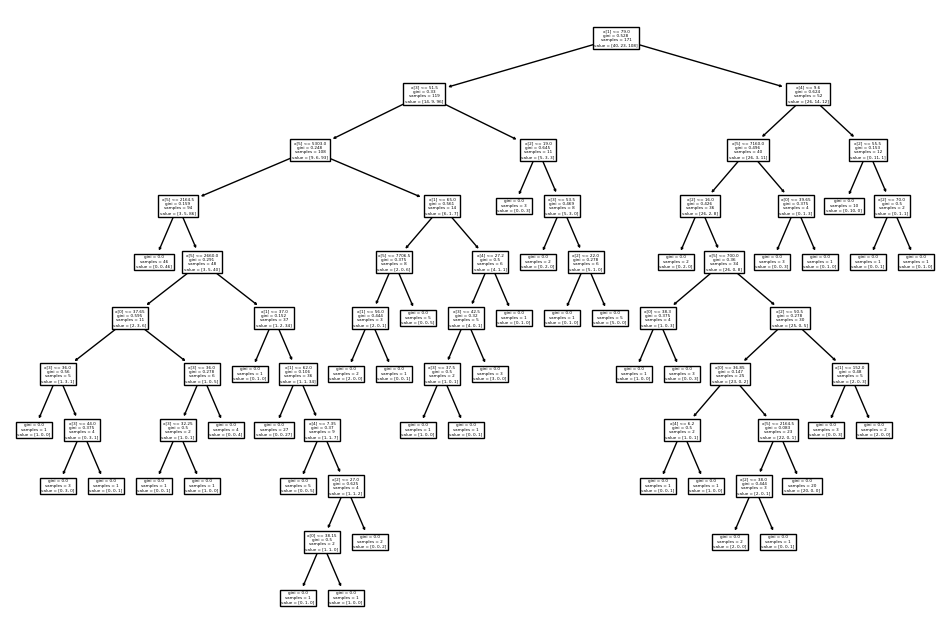

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model_decision_tree.fit(X_train, y_train))

In [47]:
y_pred = model_decision_tree.predict(X_test)

In [48]:
np.sum(y_pred == y_test)/y_test.size

0.5263157894736842

In [49]:
y_test

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2],
      dtype=object)

In [50]:
y_pred

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0])